###  Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Elementary Cellular Automata Rule Set

In [2]:
def rules(prev, curr, succ):
    global ruleset

    if( prev == 1 and curr == 1 and succ == 1): return ruleset[0]
    if( prev == 1 and curr == 1 and succ == 0): return ruleset[1]
    if( prev == 1 and curr == 0 and succ == 1): return ruleset[2]
    if( prev == 1 and curr == 0 and succ == 0): return ruleset[3]
    if( prev == 0 and curr == 1 and succ == 1): return ruleset[4]
    if( prev == 0 and curr == 1 and succ == 0): return ruleset[5]
    if( prev == 0 and curr == 0 and succ == 1): return ruleset[6]
    if( prev == 0 and curr == 0 and succ == 0): return ruleset[7]

### Steps

In [3]:
def step(currstep, matrix):
    global row
    global col
    
    prevstep = currstep -1
    for index, y in enumerate(matrix[currstep]):
        prev = matrix[prevstep][(index - 1) % col]
        curr = matrix[prevstep][index]
        succ = matrix[prevstep][(index + 1) % col]
        matrix[currstep][index] = rules(prev, curr, succ)
    return

### Elementary Cellular Automata

In [4]:
def ElementaryCA(matrix):
    global row
    global col
    for x in range(1,row): #skip first row
        step(x,matrix)

### Program

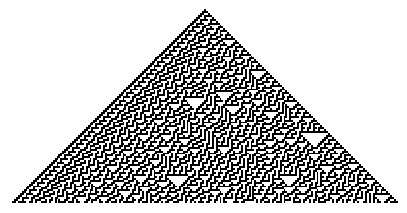

In [11]:
# Setup
matrix = np.zeros_like(a=0,shape=(100,200)) # Cellular Automata setup 100 steps for 200 element array 
rule = 30 # Elementary CA Rule number

if(rule >= 0 and rule <=255):
    # Global variables
    (row,col) = matrix.shape
    ruleset = f'{rule:08b}' # 8 bit binary representation of the rule
    
    middle = round(col/2)
    matrix[0][middle] = 1 # Set the middle of the first row as black
    ElementaryCA(matrix)
    
    # Show figure
    fig = plt.figure(figsize=(5, 5))

    ax = plt.axes()
    ax.set_axis_off()

    ax.imshow(matrix, interpolation='none',cmap='Greys')
else:
    print("Invalid ruleset")